In [1]:
import numpy as np 
import os 
from numpy.linalg import norm 
from IPython.display import Image
import matplotlib.pyplot as plt 
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
!matplotlib inline

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from sklearn import datasets 

In [3]:
mnist = datasets.load_digits()

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
mnist['data'].shape, mnist['target'].shape


((1797, 64), (1797,))

In [6]:
def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close() 

In [7]:
images = np.reshape(mnist['data'], (1797, 8, 8))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((1797, 8, 8), (1797,))

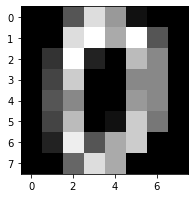

In [10]:
plot(images[0])


In [11]:
images = images/255

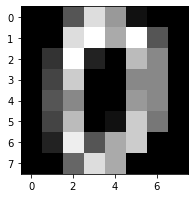

In [12]:
plot(images[0])


In [13]:
labels[0]


0

In [15]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

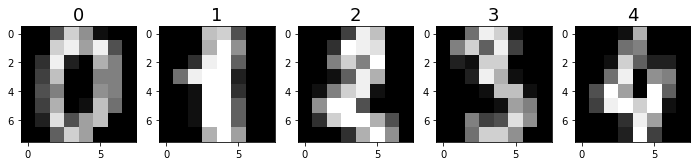

In [16]:
plots(images[:5], titles=labels[:5])

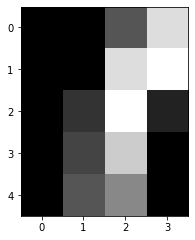

In [20]:
plot(images[0,0:5, 0:4])


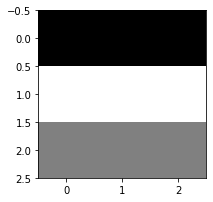

In [21]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [23]:
dims = np.index_exp[2:6:1,0:4]
images[0][dims]

array([[0.00000000e+00, 4.61361015e-05, 2.30680507e-04, 3.07574010e-05],
       [0.00000000e+00, 6.15148020e-05, 1.84544406e-04, 0.00000000e+00],
       [0.00000000e+00, 7.68935025e-05, 1.23029604e-04, 0.00000000e+00],
       [0.00000000e+00, 6.15148020e-05, 1.69165705e-04, 0.00000000e+00]])

In [24]:
corrtop = correlate(images[0], top)
corrtop[dims]

array([[ 4.61361015e-05,  7.68935025e-05, -1.23029604e-04,
        -3.22952710e-04],
       [ 1.53787005e-05, -3.07574010e-05, -6.15148020e-05,
        -7.68935025e-05],
       [ 1.53787005e-05, -4.61361015e-05, -4.61361015e-05,
        -6.15148020e-05],
       [-1.53787005e-05,  3.07574010e-05,  3.07574010e-05,
         6.15148020e-05]])

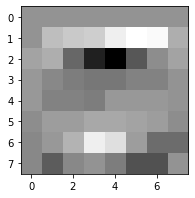

In [25]:
plot(corrtop)

In [26]:
np.rot90(top, 1)


array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

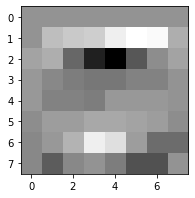

In [27]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

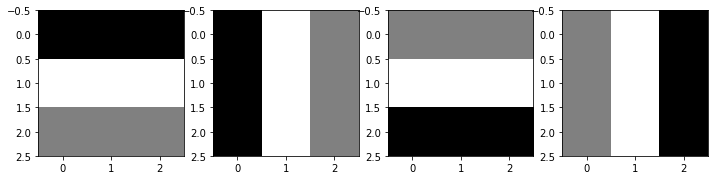

In [28]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

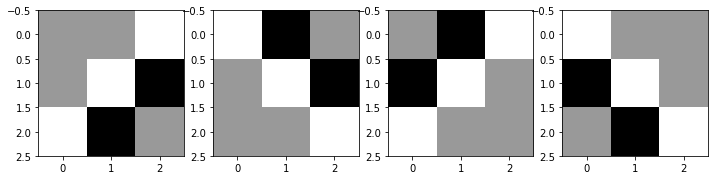

In [29]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

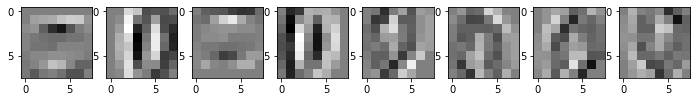

In [30]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [31]:

eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

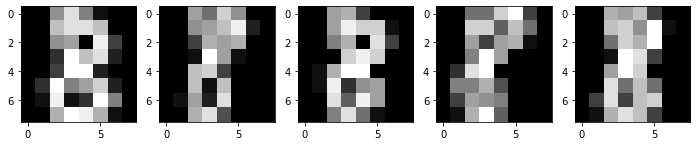

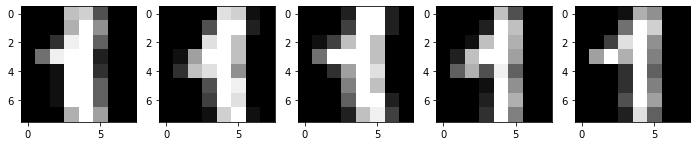

In [32]:

plots(eights[:5])
plots(ones[:5])

In [33]:
def normalize(arr): 
    return (arr-arr.mean())/arr.std()



In [34]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

NameError: name 'pool8' is not defined